In [1]:
import data_aggregator as dr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from pprint import *
%matplotlib inline

In [6]:
filepath = 'data/dataset_mood_smartphone.csv'

data_aggregator = dr.DataAggregator(filepath)

data opened


In [5]:

window_size = 5
data, target, _, _, _ = data_aggregator.read(method='combined')

data opened


Counter({7: 0.5113122171945701, 6: 0.32918552036199095, 8: 0.09502262443438914, 5: 0.053167420814479636, 4: 0.006787330316742082, 3: 0.003393665158371041, 9: 0.0011312217194570137})
normal weighted 	[0.45910290237467016, 1.0474934036939314]
normal 	[0.45646437994722955, 1.0158311345646438]
random forest 	[0.57519788918205805, 0.72559366754617416]


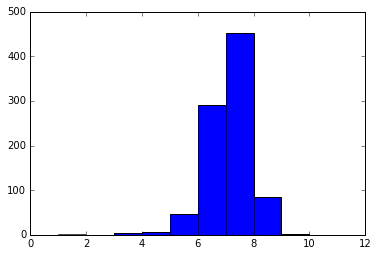

In [13]:
data_train, data_test, target_train, target_test = cross_validation.train_test_split(data, target,
                                                                                         test_size=0.3)

# target_train = np.append(target_train, [10])
plt.hist(target_train, bins=range(1,12))
weights = Counter(target_train.tolist())
total = sum(weights.values(), 0.0)
for key in weights:
    weights[key] /= total

clfw = DecisionTreeClassifier(class_weight=weights)
clf = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 20)
clfw = clfw.fit(data_train, target_train)
clf          = clf.fit(data_train, target_train)
rfc          = rfc.fit(data_train, target_train)

scores = OrderedDict()

scores['normal weighted'] = [clfw.score(data_test, target_test),metrics.mean_squared_error(target_test, clfw.predict(data_test))]
scores['normal'] = [clf.score(data_test, target_test),metrics.mean_squared_error(target_test, clf.predict(data_test))]
scores['random forest'] = [rfc.score(data_test, target_test),metrics.mean_squared_error(target_test, rfc.predict(data_test))]


print weights
for k,v in scores.items():
    print k, "\t", v
plt.show()